# Objective

The purpose of this notebook is to employ three unsupervised machine learning techniques to improve our comprehension of the morphological variations present within the Iris species. 

This information can be valuable for various stakeholders, including botanists, researchers, and horticulturists, as it enhances our ability to categorize and interpret the diversity present in Iris flowers. 

# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('./Datasets/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
class_counts = df['species'].value_counts()

print("Class Counts:")
print(class_counts)

Class Counts:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [6]:
df.shape

(150, 5)

There are 150 observations, with features including sepal length, sepal width, petal length, and petal width. The dataset comprises three types of Iris flowers: Iris-setosa, Iris-versicolor, and Iris-virginica, each with 50 instances.


**Check for missing values**

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no missing values.

# Exploratory data analysis

**Check for outliers**

C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\104556284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\104556284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\104556284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\104556284.py:9: F

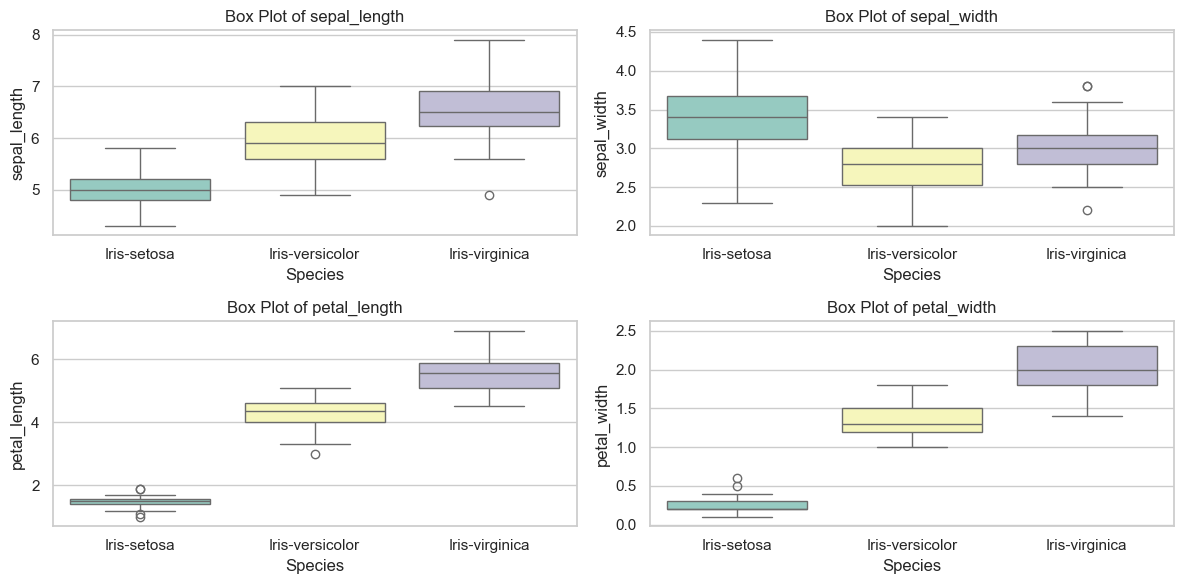

In [8]:
# Box plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df, palette='Set3')

    plt.title(f'Box Plot of {column}')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Outliers are detected in the sepal length and sepal width of Iris-virginica, as well as in the petal length of Iris-setosa and Iris-versicolor, and the petal width of Iris-setosa.

Please note that the box plot for Iris-setosa, particularly in the petal length attribute, exhibits congestion due to the presence of outliers. Before proceeding with the replacement of outliers with the median, let's examine the quantiles.

In [9]:
#Display the quantiles specifically for the 'Iris-setosa' species and the 'petal_length' attribute. 
setosa_quantiles = df[df['species'] == 'Iris-setosa']['petal_length'].quantile([0.05, 0.95])
print(setosa_quantiles)

0.05    1.2
0.95    1.7
Name: petal_length, dtype: float64


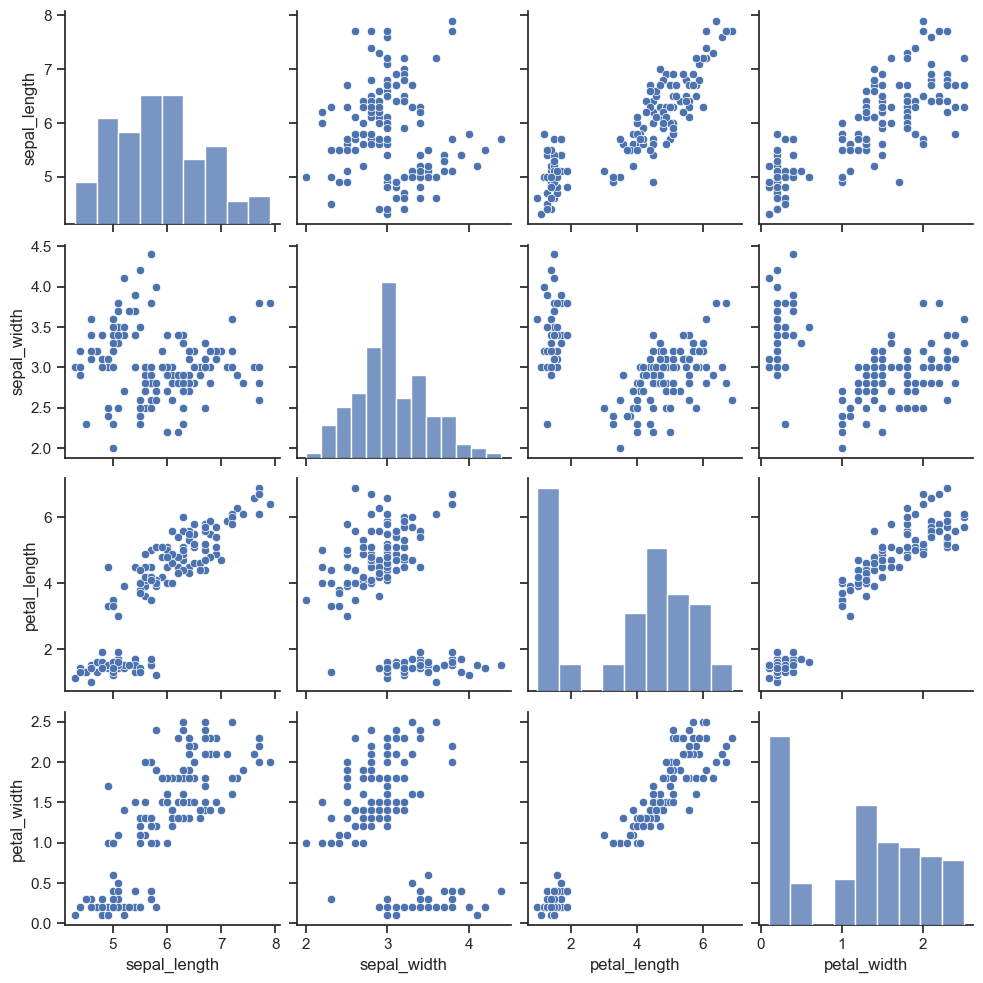

In [10]:
sns.set(style="ticks")
sns.pairplot(df,markers=["o", "s", "D"])
plt.show()

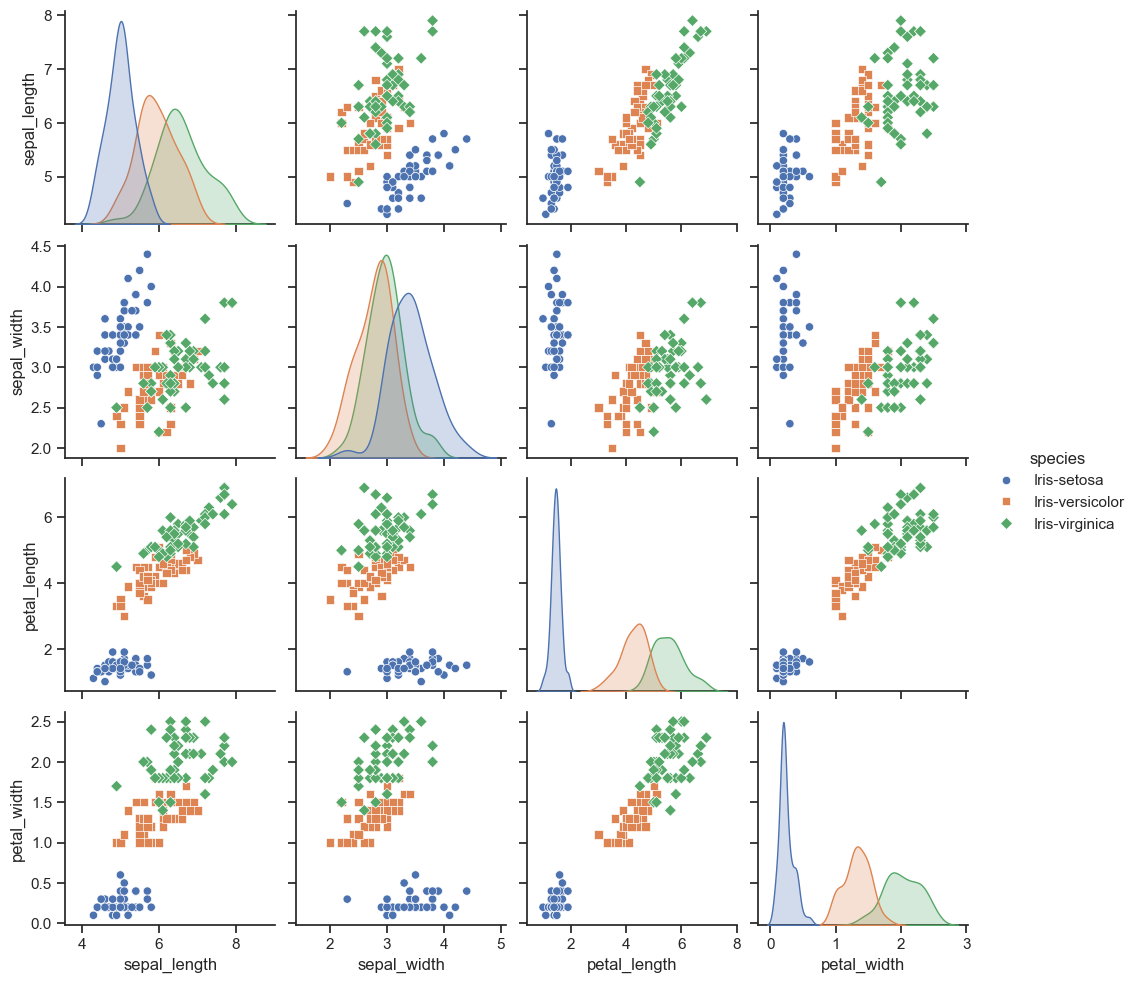

In [11]:
sns.set(style="ticks")
sns.pairplot(df,hue="species", markers=["o", "s", "D"])
plt.show()


Use a combination of Winsorization and replacing outliers with median values.

C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\2944058266.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\2944058266.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\2944058266.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\yashk\AppData\Local\Temp\ipykernel_12592\2944058266.

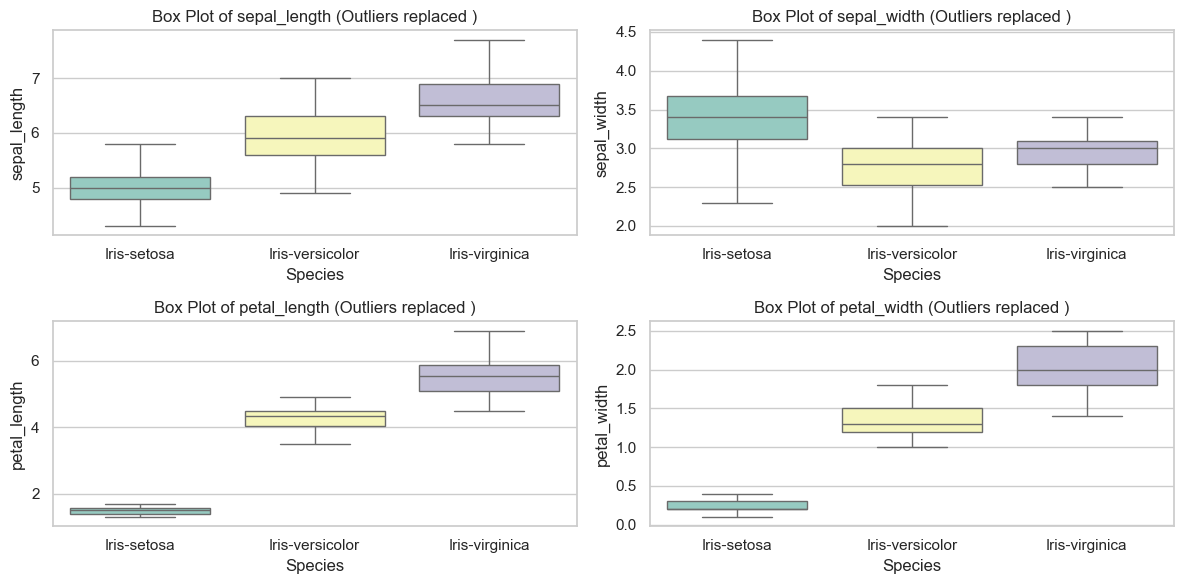

In [12]:
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species_with_outliers = {'Iris-setosa': ['petal_length', 'petal_width'],
                         'Iris-versicolor': ['petal_length'],
                         'Iris-virginica': ['sepal_length', 'sepal_width']}

# Winsorize values for 'Iris-setosa' and 'petal_length'
df.loc[(df['species'] == 'Iris-setosa') & (df['petal_length'] < 1.3), 'petal_length'] = 1.3
df.loc[(df['species'] == 'Iris-setosa') & (df['petal_length'] > 1.7), 'petal_length'] = 1.7

# Find and replace outliers with median for specific species and attributes
for species, outlier_columns in species_with_outliers.items():
    for column in outlier_columns:
        q_low = df[df['species'] == species][column].quantile(0.05)
        q_high = df[df['species'] == species][column].quantile(0.95)

        # Replace outliers with median
        median_value = df[df['species'] == species][column].median()
        df.loc[(df['species'] == species) & ((df[column] < q_low) | (df[column] > q_high)), column] = median_value

# Box plots for each attribute with 'species' as hue after handling outliers
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df, palette='Set3')

    plt.title(f'Box Plot of {column} (Outliers replaced )')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Outliers have been removed.

# Define X (features)

In [13]:
x = df.drop(columns=df.columns[-1])
x.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


**In this notebook, I'll use three distinct clustering methods: K-means, hierarchical, and Gaussian Mixture Models (GMM).**

# 1. K-Means clustering

**Define the number of clusters, K**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


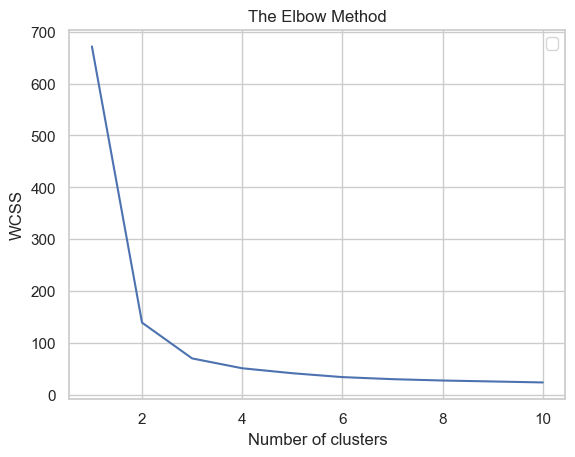

In [14]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

The elbow bend is evident at the 3rd cluster (as shown below), indicating the presence of three clusters in the dataset.

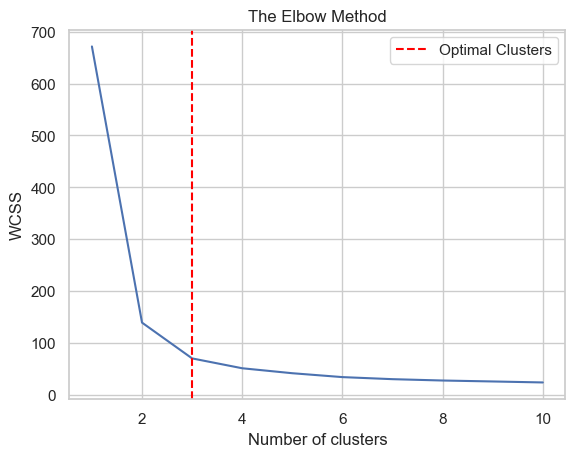

In [15]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.axvline(x=3, color='red', linestyle='--', label='Optimal Clusters')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

**Training the K-Means model on the dataset**

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

**Visualising the clusters**

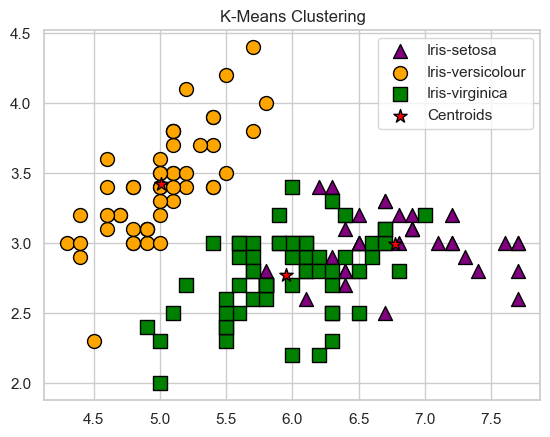

In [17]:
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans == 0, 1], s=100, c='purple', marker='^', label='Iris-setosa', edgecolors='black')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1], s=100, c='orange', marker='o', label='Iris-versicolour', edgecolors='black')
plt.scatter(x.iloc[y_kmeans == 2, 0], x.iloc[y_kmeans == 2, 1], s=100, c='green', marker='s', label='Iris-virginica', edgecolors='black')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='*', label='Centroids', edgecolors='black')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


# 2. Hierarchical Clustering

**Using the dendrogram to find the optimal number of clusters**

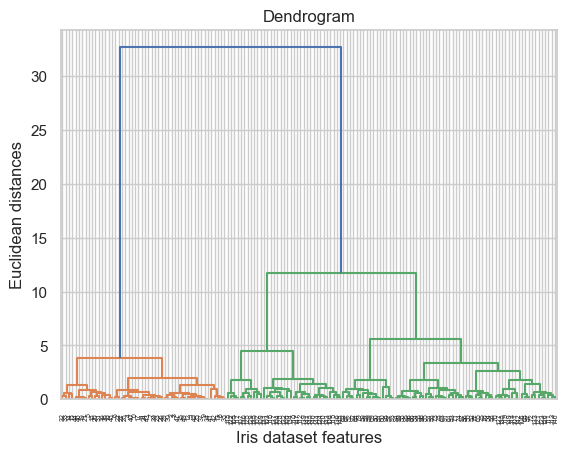

In [18]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Iris dataset features')
plt.ylabel('Euclidean distances')
plt.show()

**Training the Hierarchical Clustering model on the dataset**

In [19]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(x)

**Visualising the clusters**

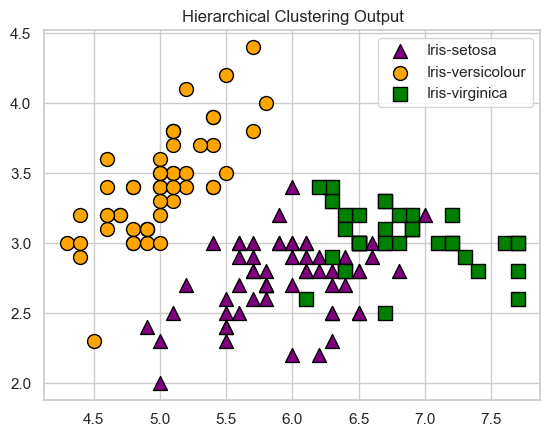

In [20]:
plt.scatter(x.iloc[y_hc == 0, 0], x.iloc[y_hc == 0, 1], s=100, c='purple', marker='^', label='Iris-setosa', edgecolors='black')
plt.scatter(x.iloc[y_hc == 1, 0], x.iloc[y_hc == 1, 1], s=100, c='orange', marker='o', label='Iris-versicolour', edgecolors='black')
plt.scatter(x.iloc[y_hc == 2, 0], x.iloc[y_hc == 2, 1], s=100, c='green', marker='s', label='Iris-virginica', edgecolors='black')
plt.title('Hierarchical Clustering Output')
plt.legend()
plt.show()

# 3. Gaussian Mixture Model (GMM)

In the context of GMMs, Bayesian Information Criterion (BIC) is often employed to choose the optimal number of components (clusters) for the GMM.

**Fit GMM models for different numbers of components and plot BIC**

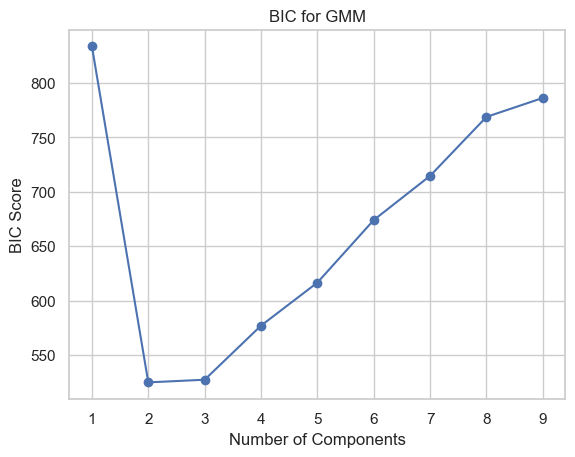

In [21]:
n_components = range(1, 10)

bic = []
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(x)
    bic.append(gmm.bic(x))

# Plot the BIC values
plt.plot(n_components, bic, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC for GMM')
plt.show()

Choose the number of clusters based on the lowest BIC value. While in this example it suggests 2 clusters, remember our dataset has three clusters, so I'm selecting 3. 

As a side note, for other datasets, follow the same logic and go with the lowest BIC for optimal clustering.

**Training the GMM model on the dataset**

In [22]:
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = gmm.fit_predict(x)

**Visualising the clusters**

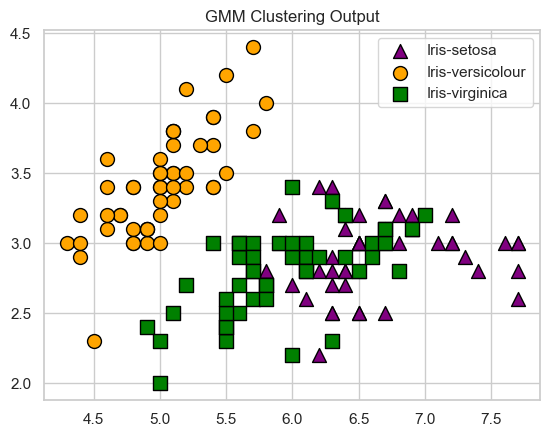

In [23]:
plt.scatter(x.iloc[y_gmm == 0, 0], x.iloc[y_gmm == 0, 1], s=100, c='purple', marker='^', label='Iris-setosa', edgecolors='black')
plt.scatter(x.iloc[y_gmm == 1, 0], x.iloc[y_gmm == 1, 1], s=100, c='orange', marker='o', label='Iris-versicolour', edgecolors='black')
plt.scatter(x.iloc[y_gmm == 2, 0], x.iloc[y_gmm == 2, 1], s=100, c='green', marker='s', label='Iris-virginica', edgecolors='black')
plt.title('GMM Clustering Output')
plt.legend()
plt.show()

# **Summary**
**In the Iris dataset with features like Sepal length, Sepal width, Petal length, and Petal width, we used three clustering algorithms: K-Means, Hierarchical Clustering, and GMM, to reveal distinct clusters.**

In [24]:
labels = list(df["species"].unique())
labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [25]:
X = df.drop("species", axis=1)
y = df["species"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Post Pruning Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

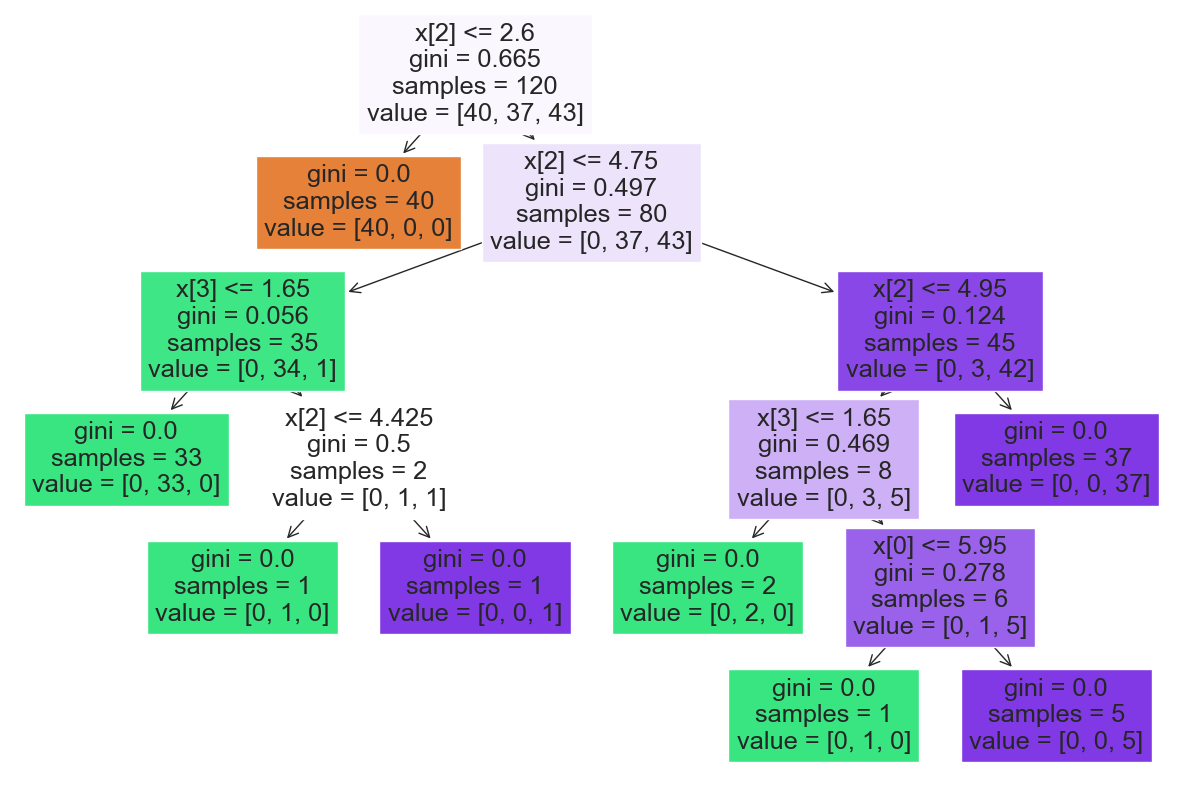

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled=True)
plt.show()

In [29]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

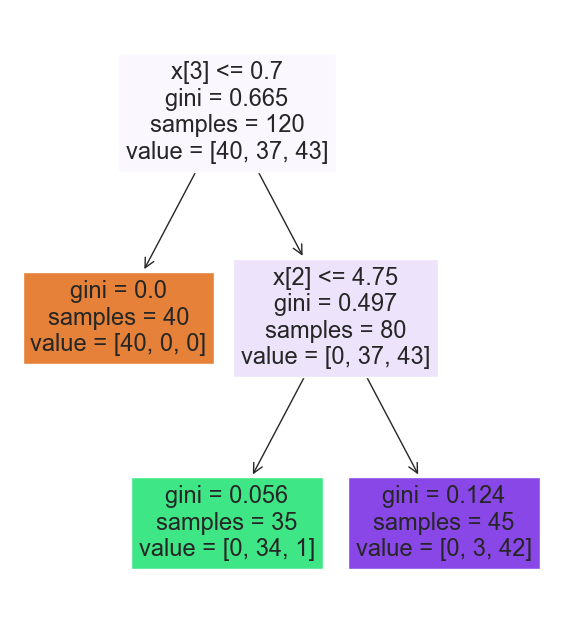

In [30]:
plt.figure(figsize=(7, 8))
tree.plot_tree(dt, filled=True)
plt.show()

Post Pruning Score:  0.9666666666666667


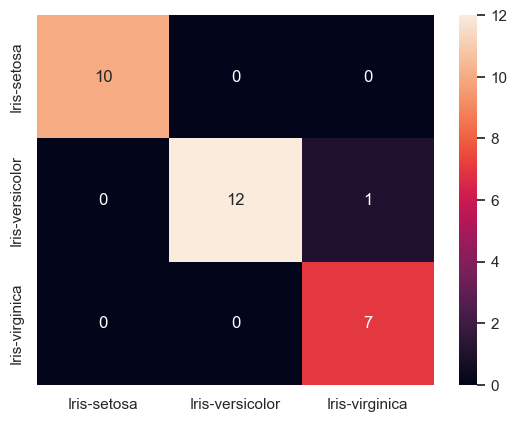

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Post Pruning Score: ", score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.show()

# Pre Pruning

In [32]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [2,3,4,5,6,7,8,9,10],
    "min_samples_split": [2,3,4,5,6,7,7,8,9,10],
    "max_features": ["auto", "sqrt", "log2"],
}

gscv = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)

c:\Users\yashk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2700 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\yashk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\yashk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\yashk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
print("Best params: ", gscv.best_params_)
print("Best score: ", gscv.best_score_)

Best params:  {'criterion': 'log_loss', 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 9, 'splitter': 'random'}
Best score:  0.9833333333333334


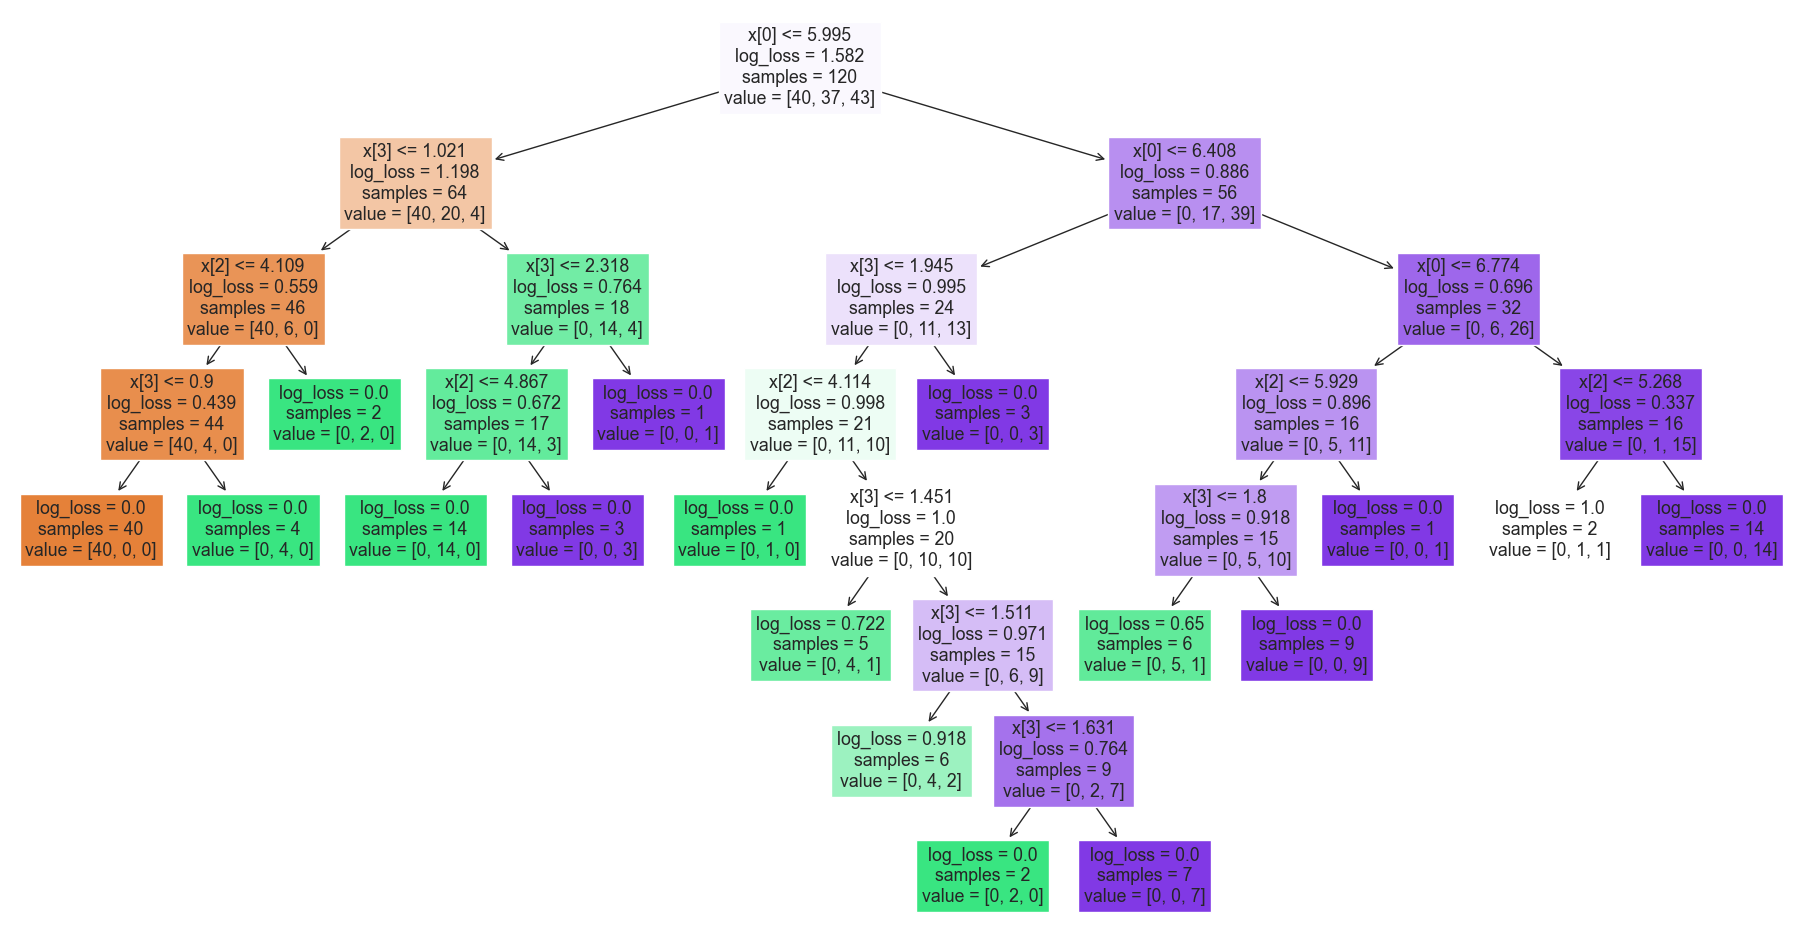

In [34]:
from sklearn import tree
dt = gscv.best_estimator_
plt.figure(figsize=(23,12))
tree.plot_tree(dt, filled=True)
plt.show()

Pre-Pruning Score:  1.0


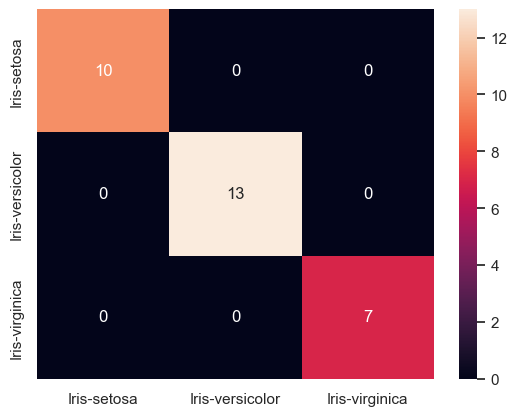

In [35]:
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Pre-Pruning Score: ", score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.show()